# Machine Learning Project -  1(Linear Regression)

## Problem Statement : 

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. So we need to forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately.

In [44]:
# Importing Libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_log_error

import warnings
warnings.filterwarnings("ignore")

In [45]:
# importing tarin and test files

train_df = pd.read_csv("train_LR.csv")
test_df = pd.read_csv("test_LR.csv")

In [46]:
train_df.shape , test_df.shape

((150150, 9), (13860, 8))

In [47]:
train_df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [48]:
test_df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [49]:
train_df.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

In [50]:
test_df.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
dtype: object

In [51]:
train_df['store_id'].value_counts().count(), test_df['store_id'].value_counts().count()
# store_id : Unique ID for each store (no numerical order to be assumed)

(76, 76)

In [52]:
train_df['sku_id'].value_counts().count() , test_df['sku_id'].value_counts().count()
# sku id : Unique ID for each product (no numerical order to be assumed)

(28, 28)

In [53]:
train_df['is_featured_sku'].value_counts()
# is_featured_sku : Was part of the featured item of the week

0    135794
1     14356
Name: is_featured_sku, dtype: int64

In [54]:
train_df['is_display_sku'].value_counts()
# is_display_sku : Product was on display at a prominent place at the store

0    130150
1     20000
Name: is_display_sku, dtype: int64

### Type - casting

In [55]:
# changing the data type of week variable from the object to date time

train_df['week'] = pd.to_datetime(train_df['week'])
test_df['week'] = pd.to_datetime(test_df['week'])

In [56]:
train_df.dtypes , test_df.dtypes

(record_ID                   int64
 week               datetime64[ns]
 store_id                    int64
 sku_id                      int64
 total_price               float64
 base_price                float64
 is_featured_sku             int64
 is_display_sku              int64
 units_sold                  int64
 dtype: object,
 record_ID                   int64
 week               datetime64[ns]
 store_id                    int64
 sku_id                      int64
 total_price               float64
 base_price                float64
 is_featured_sku             int64
 is_display_sku              int64
 dtype: object)

In [57]:
# now finding the month , day , year, dayof week, week of year using week:

# for train data:

train_df['month'] = [date.month for date in train_df.week] 
train_df['day'] = [date.day for date in train_df.week]
train_df['year'] = [date.year for date in train_df.week]  
train_df['week_of_year'] = [date.weekofyear for date in train_df.week] 
train_df['day_of_week'] = [date.dayofweek for date in train_df.week] 

# for test data :

test_df['month'] = [date.month for date in test_df.week] 
test_df['day'] = [date.day for date in test_df.week]
test_df['year'] = [date.year for date in test_df.week]  
test_df['week_of_year'] = [date.weekofyear for date in test_df.week] 
test_df['day_of_week'] = [date.dayofweek for date in test_df.week] 

In [58]:
train_df.head() , test_df.head()

(   record_ID       week  store_id  sku_id  total_price  base_price  \
 0          1 2011-01-17      8091  216418      99.0375    111.8625   
 1          2 2011-01-17      8091  216419      99.0375     99.0375   
 2          3 2011-01-17      8091  216425     133.9500    133.9500   
 3          4 2011-01-17      8091  216233     133.9500    133.9500   
 4          5 2011-01-17      8091  217390     141.0750    141.0750   
 
    is_featured_sku  is_display_sku  units_sold  month  day  year  \
 0                0               0          20      1   17  2011   
 1                0               0          28      1   17  2011   
 2                0               0          19      1   17  2011   
 3                0               0          44      1   17  2011   
 4                0               0          52      1   17  2011   
 
    week_of_year  day_of_week  
 0             3            0  
 1             3            0  
 2             3            0  
 3             3            

In [59]:
# dropping the record_id and week columns

train_df = train_df.drop(columns = ['week' , 'record_ID'], axis = 1)
test_df = test_df.drop(columns = ['week' , 'record_ID'], axis = 1)

### Treating the missing value : 

In [60]:
# now checking for the missing values in both the data set :

train_df.isnull().sum() , test_df.isnull().sum()

(store_id           0
 sku_id             0
 total_price        1
 base_price         0
 is_featured_sku    0
 is_display_sku     0
 units_sold         0
 month              0
 day                0
 year               0
 week_of_year       0
 day_of_week        0
 dtype: int64,
 store_id           0
 sku_id             0
 total_price        0
 base_price         0
 is_featured_sku    0
 is_display_sku     0
 month              0
 day                0
 year               0
 week_of_year       0
 day_of_week        0
 dtype: int64)

In [61]:
# there is only one missing value in the total_price in train data set only :
train_df['total_price'] = train_df['total_price'].fillna(train_df['total_price'].median())

In [62]:
train_df.isnull().sum()

store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
month              0
day                0
year               0
week_of_year       0
day_of_week        0
dtype: int64

In [63]:
numerical = train_df.select_dtypes(include = ['int64', 'float64'])
numerical.dtypes

store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
month                int64
day                  int64
year                 int64
week_of_year         int64
day_of_week          int64
dtype: object

In [64]:
for i in numerical.columns:
    print(f'range of {i}:[{train_df[i].min()}, {train_df[i].max()}]')

range of store_id:[8023, 9984]
range of sku_id:[216233, 679023]
range of total_price:[41.325, 562.1625]
range of base_price:[61.275, 562.1625]
range of is_featured_sku:[0, 1]
range of is_display_sku:[0, 1]
range of units_sold:[1, 2876]
range of month:[1, 12]
range of day:[1, 31]
range of year:[2011, 2013]
range of week_of_year:[1, 52]
range of day_of_week:[0, 6]


<AxesSubplot:xlabel='total_price', ylabel='Density'>

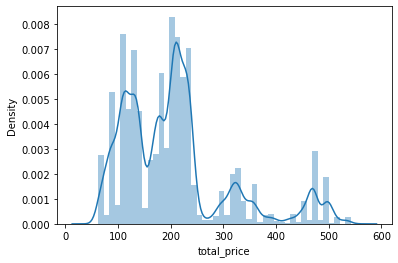

In [65]:
sns.distplot(train_df['total_price'])

<AxesSubplot:xlabel='base_price', ylabel='Density'>

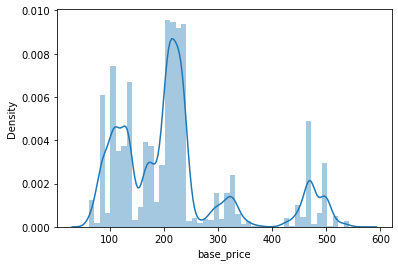

In [66]:
sns.distplot(train_df['base_price'])

In [67]:
#sns.distplot(train_df['units_sold'])

#### From above we get that all three (total_price , base_price and units_sold) are highly right skewed 
#### So , in order to remove skewnees we will do log transformation of all

In [68]:
train_df['total_price'] = np.log(train_df['total_price'].values + 1)
test_df['total_price'] = np.log(test_df['total_price'].values + 1)

train_df['base_price'] = np.log(train_df['base_price'].values + 1)
test_df['base_price'] = np.log(test_df['base_price'].values + 1)

## Implementing the model : 

In [69]:
'''Segregating the dependent and independent variable for model training'''

x = train_df.drop('units_sold' , axis = 1)
y = train_df['units_sold']

x.shape , y.shape

((150150, 11), (150150,))

In [70]:
trainx , testx, trainy , testy = train_test_split(x, y, test_size = 0.25,  random_state = 42)

In [71]:
trainx.shape , testx.shape , trainy.shape , testy.shape

((112612, 11), (37538, 11), (112612,), (37538,))

### Linear regression

In [72]:
lr = LinearRegression() #creating instance for LinearRegression
lr.fit(trainx , trainy)

LinearRegression()

In [73]:
pred_y = lr.predict(testx)

In [74]:
print(np.sqrt(mean_squared_log_error(testy, pred_y)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

### Decision Tree

In [36]:
tree = DecisionTreeRegressor()
tree.fit(trainx , trainy) 

DecisionTreeRegressor()

In [37]:
pred_tree = tree.predict(testx) 

In [38]:
print(np.sqrt(mean_squared_log_error(testy, pred_tree)))

0.5583601276793381


### Random Forest 

In [39]:
forest = RandomForestRegressor()
forest.fit(trainx , trainy) 

RandomForestRegressor()

In [40]:
pred_forest = forest.predict(testx)

In [41]:
print(np.sqrt(mean_squared_log_error(testy, pred_forest)))

0.4183648556866954


In [76]:
# now to check the predicted sales value we will use test_df data
prediction = forest.predict(test_df)
prediction

array([18.62, 24.49, 39.58, ..., 43.71, 14.17, 11.66])

In [78]:
#creating a new variable for the predicted sales value
test_df['Predicted_sales_value'] = prediction 

In [79]:
test_df.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,day,year,week_of_year,day_of_week,Predicted_sales_value
0,8091,216418,4.694096,4.694096,0,0,7,16,2013,29,1,18.62
1,8091,216419,4.700594,4.700594,0,0,7,16,2013,29,1,24.49
2,8091,216425,4.904904,4.904904,0,0,7,16,2013,29,1,39.58
3,8091,216233,4.904904,4.904904,0,0,7,16,2013,29,1,26.67
4,8091,217390,5.180097,5.180097,0,0,7,16,2013,29,1,39.70
